In [1]:
%matplotlib inline

import cv2
import time
from copy import copy
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [90]:
img = cv2.imread('data/brown.png')

In [91]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[...,1] = hsv[...,1]*5
saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
found, corners = cv2.findChessboardCorners(saturated, (7,7))
corner_img = copy(img)
cv2.drawChessboardCorners(corner_img, (7,7), corners, found)
found

True

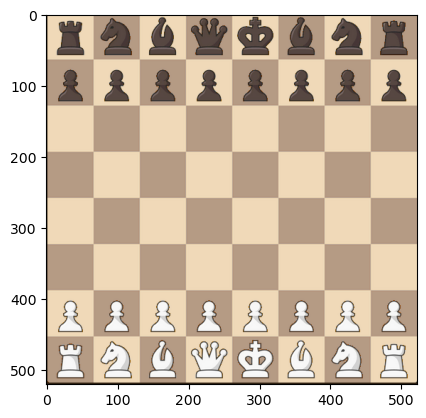

In [92]:
plt.imshow(cv2.cvtColor(saturated, cv2.COLOR_BGR2RGB))

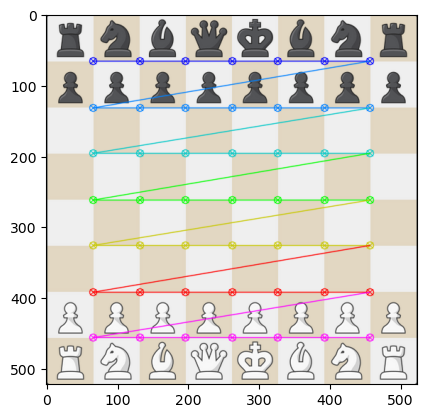

In [72]:
plt.imshow(corner_img)

In [8]:
chessboard = np.empty((8,8), dtype='object')
corner_array = np.array(corners).reshape(7, 7, 2)
corner_array = np.swapaxes(corner_array, 0, 1)

In [9]:
width, height, channels = img.shape
for y in range(8):
    for x in range(8):   
        top_left = np.copy(corner_array[max(0, x-1)][max(0, y-1)]) + 1
        if x == 0: top_left[0] = 0
        if y == 0: top_left[1] = 0
            
        bot_right = np.copy(corner_array[min(6, x)][min(6, y)])
        if x == 7: bot_right[0] = width-1
        if y == 7: bot_right[1] = height-1
        
        chessboard[x][7 - y] = img[
            round(top_left[1]):round(bot_right[1]), 
            round(top_left[0]):round(bot_right[0])
        ]    

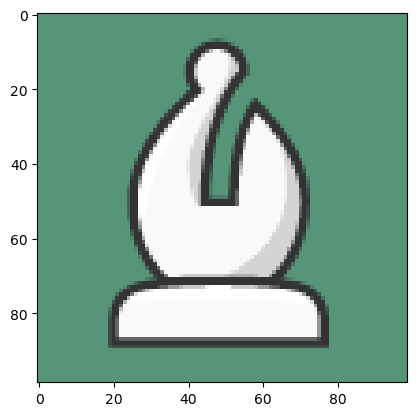

In [99]:
image = chessboard[2][0]
edge = cv2.Canny(image, 0, 255)
resized = cv2.resize(image,(32, 32), cv2.INTER_LINEAR)

plt.imshow(image)

In [53]:
rgb = cv2.calcHist([image], [0, 1, 2], None, [5, 5, 5], [0, 256, 0, 256, 0, 256])

In [55]:
rgb.shape

(5, 5, 5)

In [100]:
#f9f9f9
#525457
unique, colors = np.unique(
    image.reshape(-1, image.shape[-1]),
    axis=0,
    return_counts=True
)
white = np.where(np.all(unique == [249, 249, 249], axis=-1))[0]
black = np.where(np.all(unique == [82, 84, 87], axis=-1))[0]
if len(white) == 0:
    print('black')
elif len(black) == 0 or colors[white] > colors[black]:
    print('white')
else:
    print('black')

white
